# Python para Ciência de Dados

**Autor**: Alexandre Fortes Santana

**Professor**: Rodrigo Silva

# Dataset: Fórmula 1 (1950 - 2023)

Data set selecionado: https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020?select=results.csv

"**About Dataset**

**Context**

"*Formula 1 (a.k.a. F1 or Formula One) is the highest class of single-seater auto racing sanctioned by the Fédération Internationale de l'Automobile (FIA) and owned by the Formula One Group. The FIA Formula One World Championship has been one of the premier forms of racing around the world since its inaugural season in 1950. The word "formula" in the name refers to the set of rules to which all participants' cars must conform. A Formula One season consists of a series of races, known as Grands Prix, which take place worldwide on purpose-built circuits and on public roads.*"

**Content**

"*The dataset consists of all information on the Formula 1 races, drivers, constructors, qualifying, circuits, lap times, pit stops, championships from 1950 till the latest 2023 season.*"

**Acknowledgements**

"*The data is compiled from http://ergast.com/mrd/*"

**Inspiration**

"*Races are won at the track. Championships are won at the factory." - Mercedes (2019)

With the amount of data being captured, analyzed and used to design, build and drive the Formula 1 cars is astounding. It is a global sport being followed by millions of people worldwide and it is very fascinating to see drivers pushing their limit in these vehicles to become the fastest racers in the world!*"

---

Todas as bases se encontram replicadas no repositório do projeto:
https://github.com/alexandrefortes/Python-para-Ciencia-de-Dados

## Carregamento e preparo dos dados

In [1]:
import pandas as pd
import numpy as np

# Remove display limit
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_colwidth', None)

df_race_results = pd.read_csv('F1/results.csv').add_prefix('result_')
df_races = pd.read_csv('F1/races.csv').add_prefix('race_')
df_constructors = pd.read_csv('F1/constructors.csv').add_prefix('constructor_')
df_drivers = pd.read_csv('F1/drivers.csv').add_prefix('driver_')

# Merge
merged_df = pd.merge(df_race_results, df_races, left_on='result_raceId', right_on='race_raceId', how='left')
merged_df = pd.merge(merged_df, df_drivers, left_on='result_driverId', right_on='driver_driverId', how='left')
merged_df = pd.merge(merged_df, df_constructors, left_on='result_constructorId', right_on='constructor_constructorId', how='left')

# Adjusting some column names for better readability
merged_df.rename(columns={'result_grid': 'result_stating_grid', 'result_positionOrder' : 'result_final_position', 'driver_driverRef' : 'driver_name'}, inplace=True)
# Remove not used collumns
merged_df.drop(['result_laps', 'driver_forename', 'driver_surname', 'constructor_constructorId','constructor_constructorRef','constructor_url','driver_code','driver_dob','driver_driverId','driver_number','race_circuitId','race_date','race_fp1_date','race_fp1_time','race_fp2_date','race_fp2_time','race_fp3_date','race_fp3_time','race_quali_date','race_quali_time','race_raceId','race_round','race_sprint_date','race_sprint_time','race_time','result_constructorId','result_driverId','result_fastestLap','result_fastestLapSpeed','result_fastestLapTime','result_milliseconds','result_number','result_position','result_positionText','result_raceId','result_rank','result_statusId','result_time'], axis=1, inplace=True)

# Create a new collumn 'win' with 'True' if 'result_final_position' is 1 and 'False' otherwise
merged_df['win'] = merged_df['result_final_position'] == 1
# Create a new collumn 'podium_finish' with 'True' if 'result_final_position' is <= 3
merged_df['podium_finish'] = merged_df['result_final_position'].apply(lambda x: True if x <= 3 else False)

### Avaliar a poporção de dados faltantes

In [2]:
nan_proportion = merged_df.isna().mean()
nan_proportion

result_resultId            0.0
result_stating_grid        0.0
result_final_position      0.0
result_points              0.0
race_year                  0.0
race_name                  0.0
race_url                   0.0
driver_name                0.0
driver_nationality         0.0
driver_url                 0.0
constructor_name           0.0
constructor_nationality    0.0
win                        0.0
podium_finish              0.0
dtype: float64

### Avaliar tipo dos dados

In [3]:
print(merged_df.dtypes)

result_resultId              int64
result_stating_grid          int64
result_final_position        int64
result_points              float64
race_year                    int64
race_name                   object
race_url                    object
driver_name                 object
driver_nationality          object
driver_url                  object
constructor_name            object
constructor_nationality     object
win                           bool
podium_finish                 bool
dtype: object


### Análise Descritiva

In [4]:
merged_df.describe()

result_resultId  result_stating_grid  result_final_position   
count     25840.000000         25840.000000           25840.000000  \
mean      12921.334327            11.179063              12.876006   
std        7460.682031             7.243725               7.712391   
min           1.000000             0.000000               1.000000   
25%        6460.750000             5.000000               6.000000   
50%       12920.500000            11.000000              12.000000   
75%       19380.250000            17.000000              18.000000   
max       25845.000000            34.000000              39.000000   

       result_points     race_year  
count   25840.000000  25840.000000  
mean        1.877053   1990.251780  
std         4.169849     19.345632  
min         0.000000   1950.000000  
25%         0.000000   1976.000000  
50%         0.000000   1990.000000  
75%         2.000000   2007.000000  
max        50.000000   2022.000000

# Análises Gráficas

## Performance de contrutores por ano

Vamos analisar como foi a jornada das equipes com maior número de vitórias da história da Fórmula 1 até este momento.

### Prepara dados das equipes

In [5]:
# Calculate total races per year
total_races_per_year = merged_df.groupby('race_year')['race_name'].nunique().rename('total_races')

# Group by year, sum wins and total points
wins_and_points_per_constructor = merged_df.groupby(['race_year', 'constructor_name']).agg({'win': 'sum', 'result_points': 'sum'}) 

# Rename for clarity
wins_and_points_per_constructor.rename(columns={'win': 'wins', 'result_points': 'total_points'}, inplace=True)

# Reset index to merge with total_races_per_year
wins_and_points_per_constructor = wins_and_points_per_constructor.reset_index()

# Merge with total_races_per_year to include total races in each year
wins_and_points_per_constructor = wins_and_points_per_constructor.merge(total_races_per_year, on='race_year')

# Calculate average points
wins_and_points_per_constructor['average_points'] = wins_and_points_per_constructor['total_points'] / wins_and_points_per_constructor['total_races']

# For each year, get top 3 constructors with most wins
wins_and_points_per_constructor = wins_and_points_per_constructor.groupby('race_year').apply(lambda x: x.nlargest(3, 'wins')).reset_index(drop=True)

# Remove constructors with no wins
wins_and_points_per_constructor = wins_and_points_per_constructor[wins_and_points_per_constructor['wins'] > 0]

In [6]:
wins_and_points_per_constructor.describe()

race_year      wins  total_points  total_races  average_points
count   210.000000  210.0000    210.000000   210.000000      210.000000
mean   1985.861905    4.8000    157.102619    14.785714        9.476317
std      20.865139    3.6743    172.006245     3.957524        8.077438
min    1950.000000    1.0000      8.000000     7.000000        0.937500
25%    1968.000000    2.0000     62.250000    11.000000        4.439236
50%    1985.500000    4.0000     87.500000    16.000000        6.468750
75%    2003.750000    6.0000    155.750000    17.000000       10.237500
max    2022.000000   19.0000    765.000000    22.000000       37.000000

### Análise de vitórias

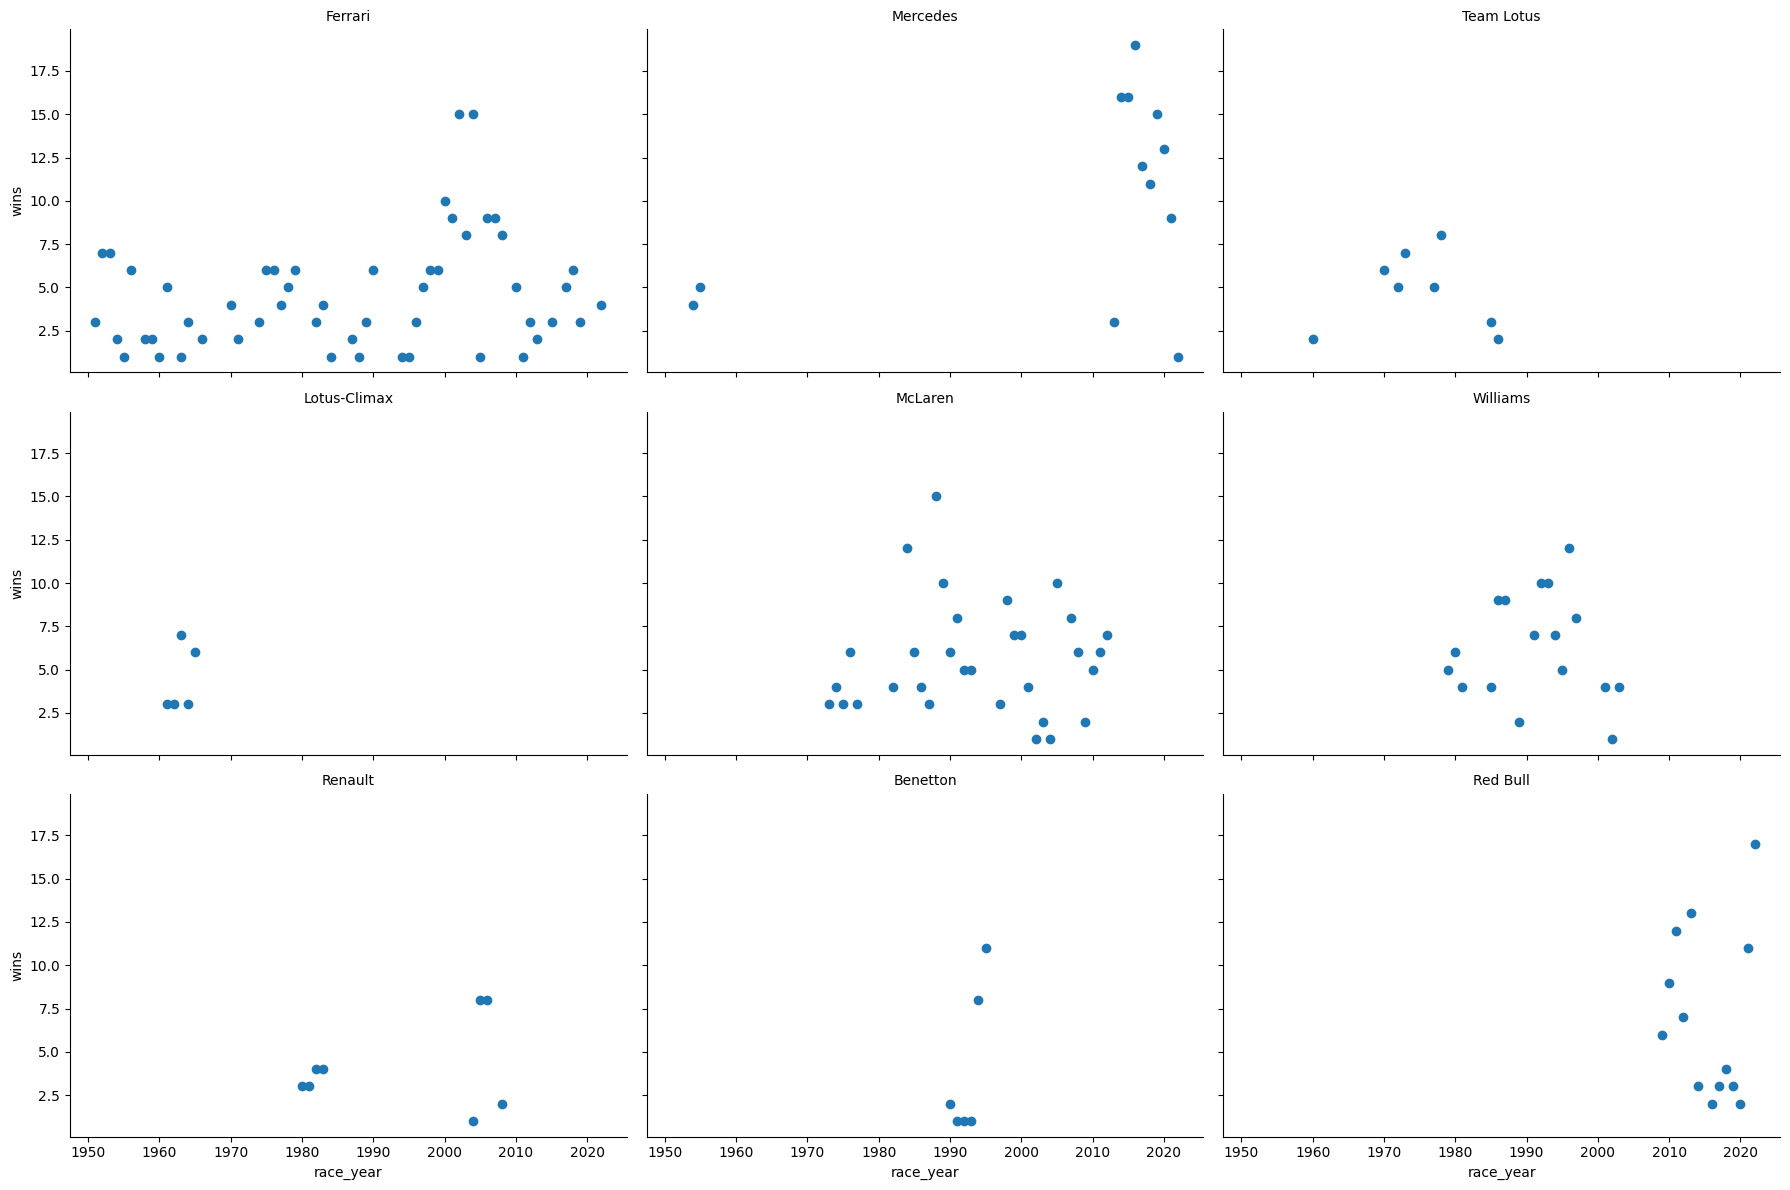

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# 9 Top contrutores
top_constructors_to_plot = wins_and_points_per_constructor.groupby('constructor_name')['wins'].sum().nlargest(9).index

# Extrai dados destes construtores
wins_and_points_per_constructor_to_plot = wins_and_points_per_constructor[wins_and_points_per_constructor['constructor_name'].isin(top_constructors_to_plot)]

# FacetGrid 
g = sns.FacetGrid(wins_and_points_per_constructor_to_plot, col='constructor_name', col_wrap=3, height=4, aspect=1.5)

# Uma equipe por bloco
g = g.map(plt.scatter, 'race_year', 'wins')

# Add título
g = g.set_titles("{col_name}")

### Análise da média de pontos

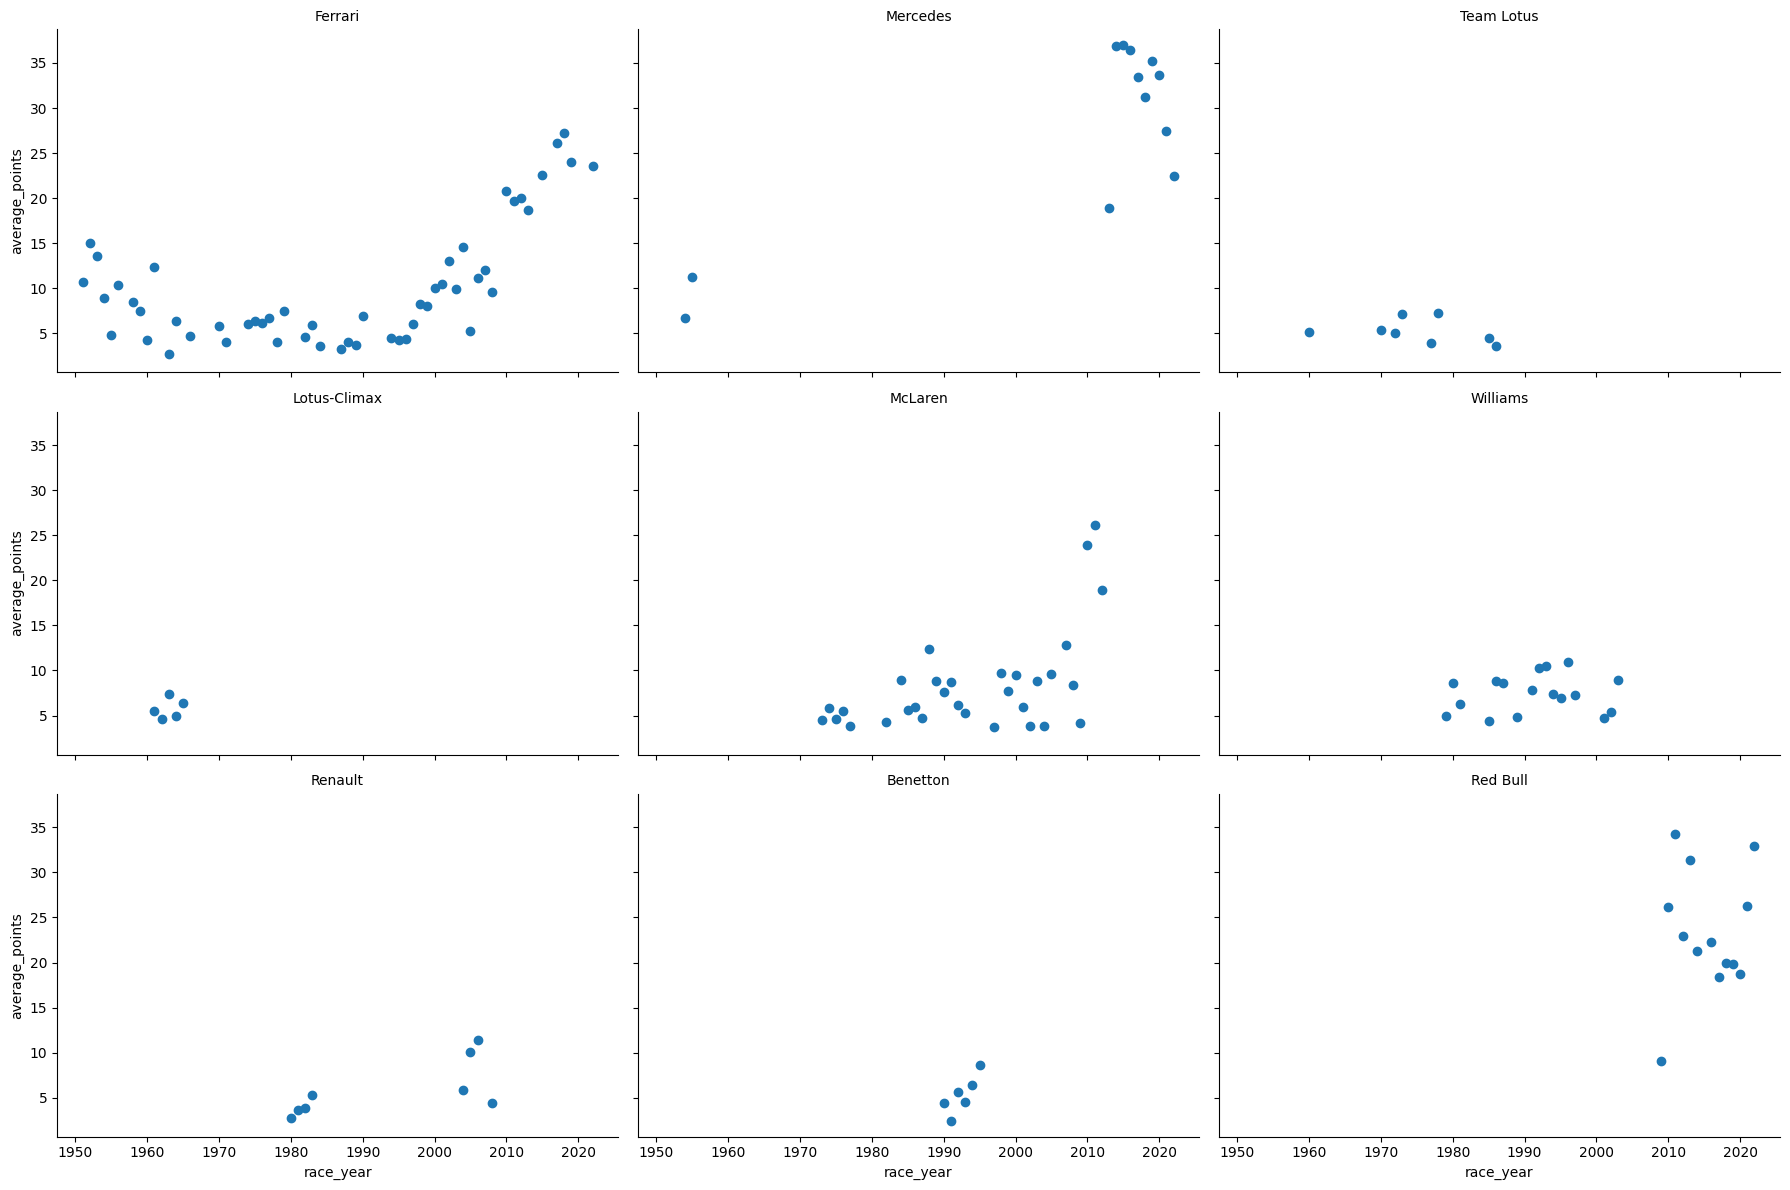

In [8]:
# FacetGrid 
g = sns.FacetGrid(wins_and_points_per_constructor_to_plot, col='constructor_name', col_wrap=3, height=4, aspect=1.5)

# Uma equipe por bloco
g = g.map(plt.scatter, 'race_year', 'average_points')

# Add título
g = g.set_titles("{col_name}")

## Performance de pilotos por ano

Vamos analisar como foi a jornada dos pilotos com maior número de vitórias da história da Fórmula 1 até este momento.

### Prepara dados dos pilotos

In [9]:
# Calculate total races per year
total_races_per_year = merged_df.groupby('race_year')['race_name'].nunique().rename('total_races')

# Group by year, sum wins and total points
wins_and_points_per_driver = merged_df.groupby(['race_year', 'driver_name']).agg({'win': 'sum', 'result_points': 'sum'}) 

# Rename for clarity
wins_and_points_per_driver.rename(columns={'win': 'wins', 'result_points': 'total_points'}, inplace=True)

# Reset index to merge with total_races_per_year
wins_and_points_per_driver = wins_and_points_per_driver.reset_index()

# Merge with total_races_per_year to include total races in each year
wins_and_points_per_driver = wins_and_points_per_driver.merge(total_races_per_year, on='race_year')

# Calculate average points
wins_and_points_per_driver['average_points'] = wins_and_points_per_driver['total_points'] / wins_and_points_per_driver['total_races']

# For each year, get top 3 drivers with most wins
wins_and_points_per_driver = wins_and_points_per_driver.groupby('race_year').apply(lambda x: x.nlargest(3, 'wins')).reset_index(drop=True)

# Remove drivers with no wins
wins_and_points_per_driver = wins_and_points_per_driver[wins_and_points_per_driver['wins'] > 0]

In [10]:
wins_and_points_per_driver.describe()

race_year        wins  total_points  total_races  average_points
count   219.000000  219.000000    219.000000   219.000000      219.000000
mean   1986.000000    3.977169     99.558995    14.780822        5.940498
std      21.119581    2.718342    103.550872     4.013440        4.801945
min    1950.000000    1.000000      4.000000     7.000000        0.464286
25%    1968.000000    2.000000     37.000000    11.000000        3.069712
50%    1986.000000    3.000000     60.000000    16.000000        4.312500
75%    2004.000000    5.000000     99.500000    17.000000        6.291667
max    2022.000000   15.000000    433.000000    22.000000       20.894737

### Análise de vitórias

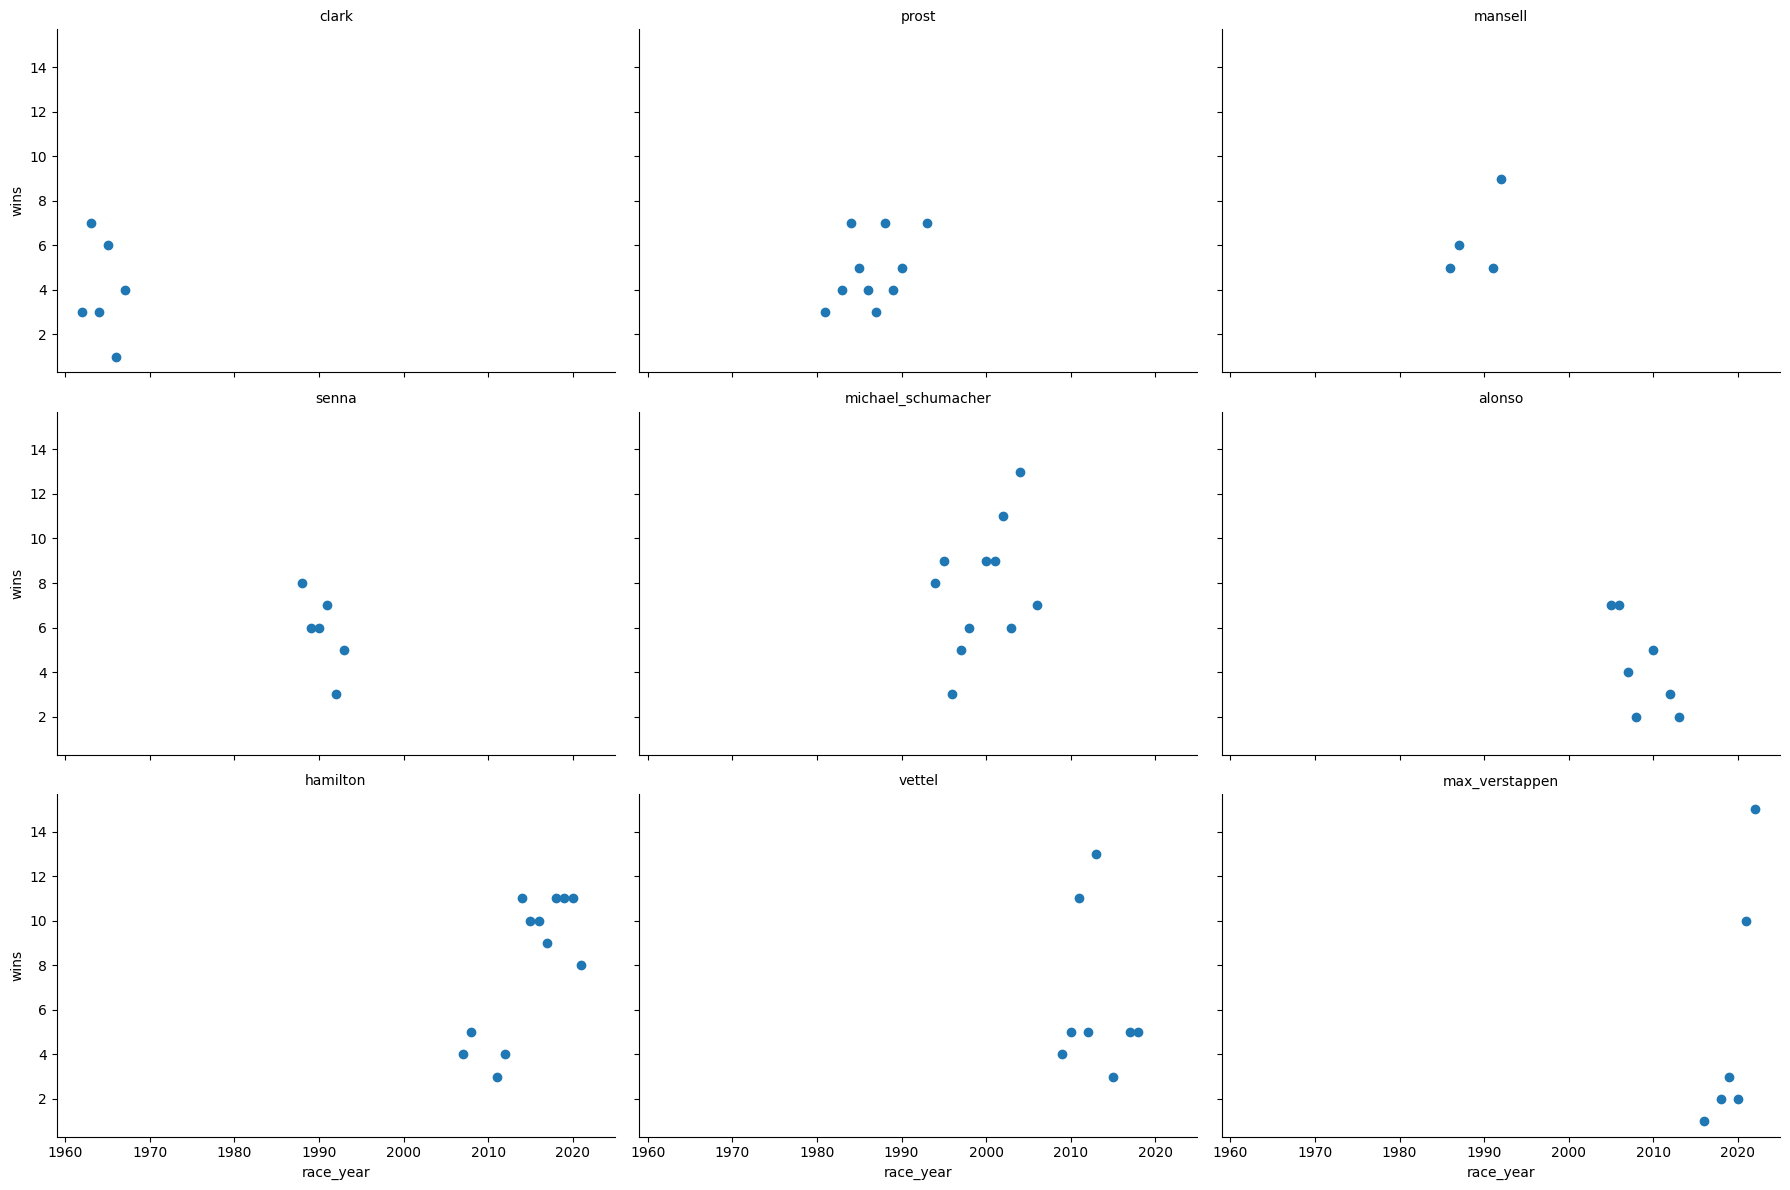

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# 9 Top pilotos
top_drivers_to_plot = wins_and_points_per_driver.groupby('driver_name')['wins'].sum().nlargest(9).index

# Extrai dados destes pilotos
wins_and_points_per_driver_to_plot = wins_and_points_per_driver[wins_and_points_per_driver['driver_name'].isin(top_drivers_to_plot)]

# FacetGrid 
g = sns.FacetGrid(wins_and_points_per_driver_to_plot, col='driver_name', col_wrap=3, height=4, aspect=1.5)

# Um piloto por bloco
g = g.map(plt.scatter, 'race_year', 'wins')

# Add título
g = g.set_titles("{col_name}")

### Análise da média de pontos

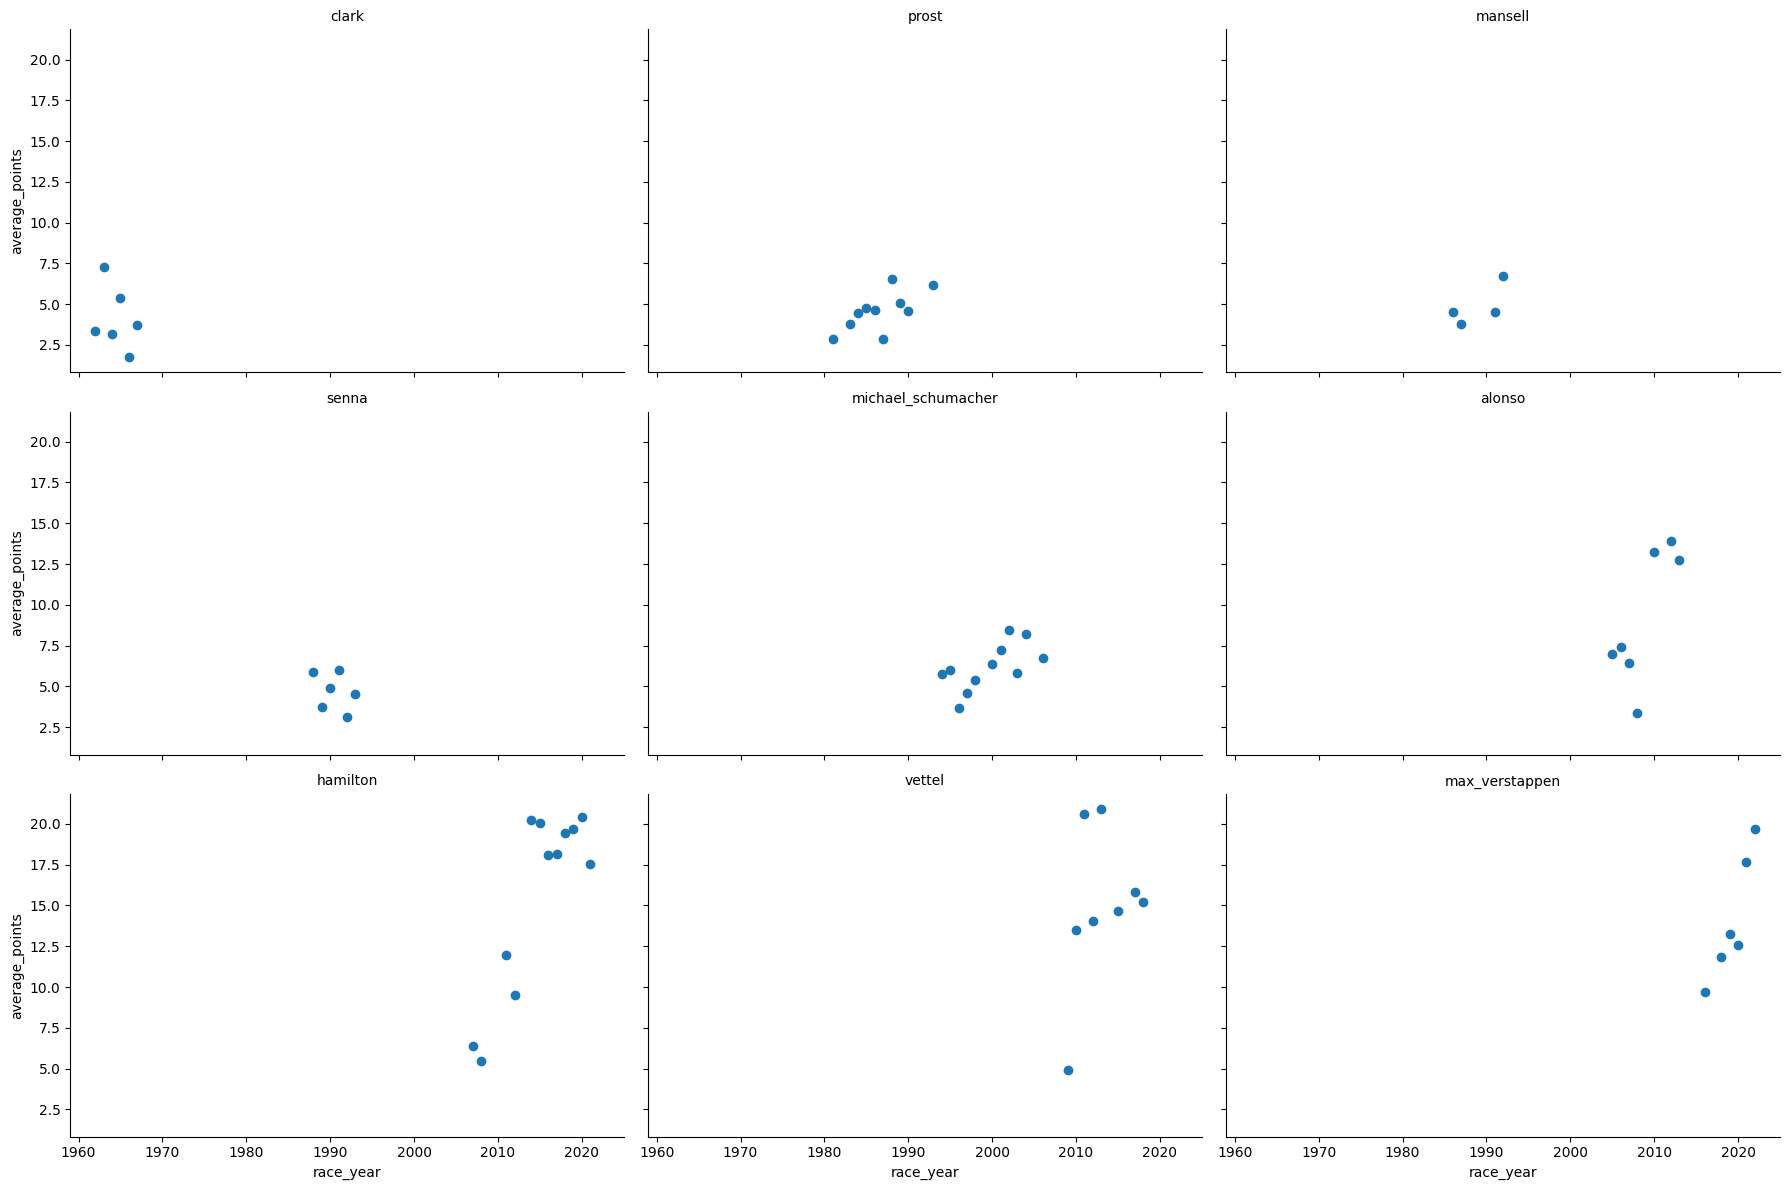

In [12]:
# FacetGrid 
g = sns.FacetGrid(wins_and_points_per_driver_to_plot, col='driver_name', col_wrap=3, height=4, aspect=1.5)

# Um piloto por bloco
g = g.map(plt.scatter, 'race_year', 'average_points')

# Add título
g = g.set_titles("{col_name}")

## Influência do grid de largada no resultado final

Text(0, 0.5, 'Final Position')

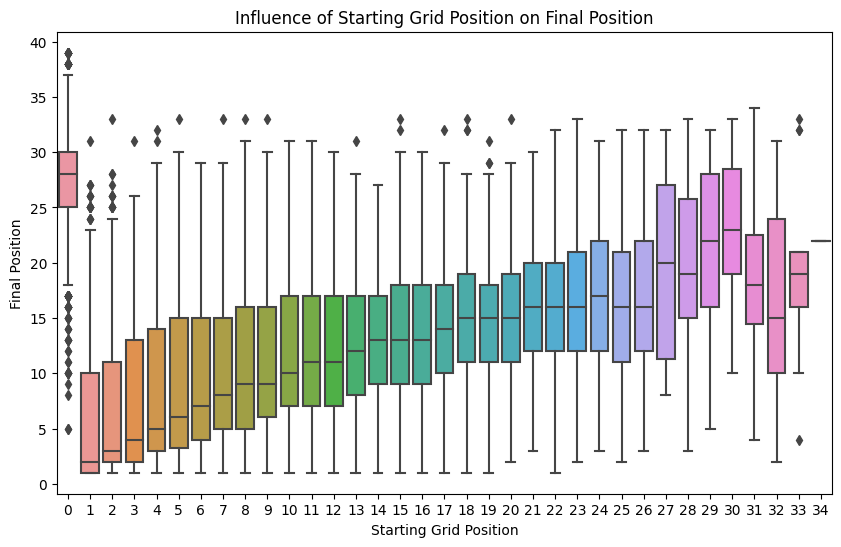

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='result_stating_grid', y='result_final_position', data=merged_df)
plt.title('Influence of Starting Grid Position on Final Position')
plt.xlabel('Starting Grid Position')
plt.ylabel('Final Position')

Pode-se observar que temos registros onde a posição de largada é zero. Como a pontuação para estas posições também é zero (na maioria dos cados), é possível que sejam casos nos quais os pilotos não finalizaram etapa de qualificação. Os dados permitem essa investigação, com a tabela de status. Entretanto, dado o tempo escasso, essa análise foi omitida.

# Aplicando métdos de aprendizado para Classificação

A análise de dados da Fórmula 1 é bastante complexa, afinal, envolve variáveis de diversos tipos como saúde do piloto, mecânica dos carros, condição das pistas, clima, etc. Entretanto, para fins acadêmicos, estamos usando um modelo de classificação simples para prever se um piloto terminará no podium (top 3).

As variáveis de treinamento serão:

- `result_stating_grid`
- `result_final_position`
- `result_points`
- `race_name`
- `driver_name`
- `constructor_name`
- `win`
- `podium_finish`
- `race_year`

Queremos prever a variável `podium_finish`.

As variáveis de entrada para previsão serão:

- `result_stating_grid`
- `race_name`
- `driver_name`
- `constructor_name`

## Definindo melhor modelo para treinamento

### Preparo dos dados

In [88]:
import seaborn as sns
# Clean and prepare the data

# Copying the original dataframe to use on training
merged_df_base_train = merged_df.copy()

# Converting the field 'result_final_position' to numeric, replacing any problematic values with NaN
merged_df_base_train['result_final_position'] = pd.to_numeric(merged_df_base_train['result_final_position'], errors='coerce')

# Convert 'podium_finish' and 'win' to numeric
merged_df_base_train['podium_finish'] = merged_df_base_train['podium_finish'].astype(int)
merged_df_base_train['win'] = merged_df_base_train['win'].astype(int)

# Select only the collumns that we want for the model
merged_df_base_train.drop(['result_resultId', 'race_url', 'driver_nationality', 'driver_url', 'constructor_nationality'], axis=1, inplace=True)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in merged_df_base_train.columns:
    if merged_df_base_train[col].dtype == 'object':
        merged_df_base_train[f"{col}_str"] = merged_df_base_train[col]
        merged_df_base_train[col] = le.fit_transform(merged_df_base_train[col].astype(str))

# Copying the dataframe for conversion reference. We're doing this because we need to use the same mapping to convert new data that the user will provide.
merged_df_encoded = merged_df_base_train.copy()  
merged_df_encoded.drop(['race_name_str', 'driver_name_str', 'constructor_name_str'], axis=1, inplace=True)

### Distribuição Considerando classe "win"

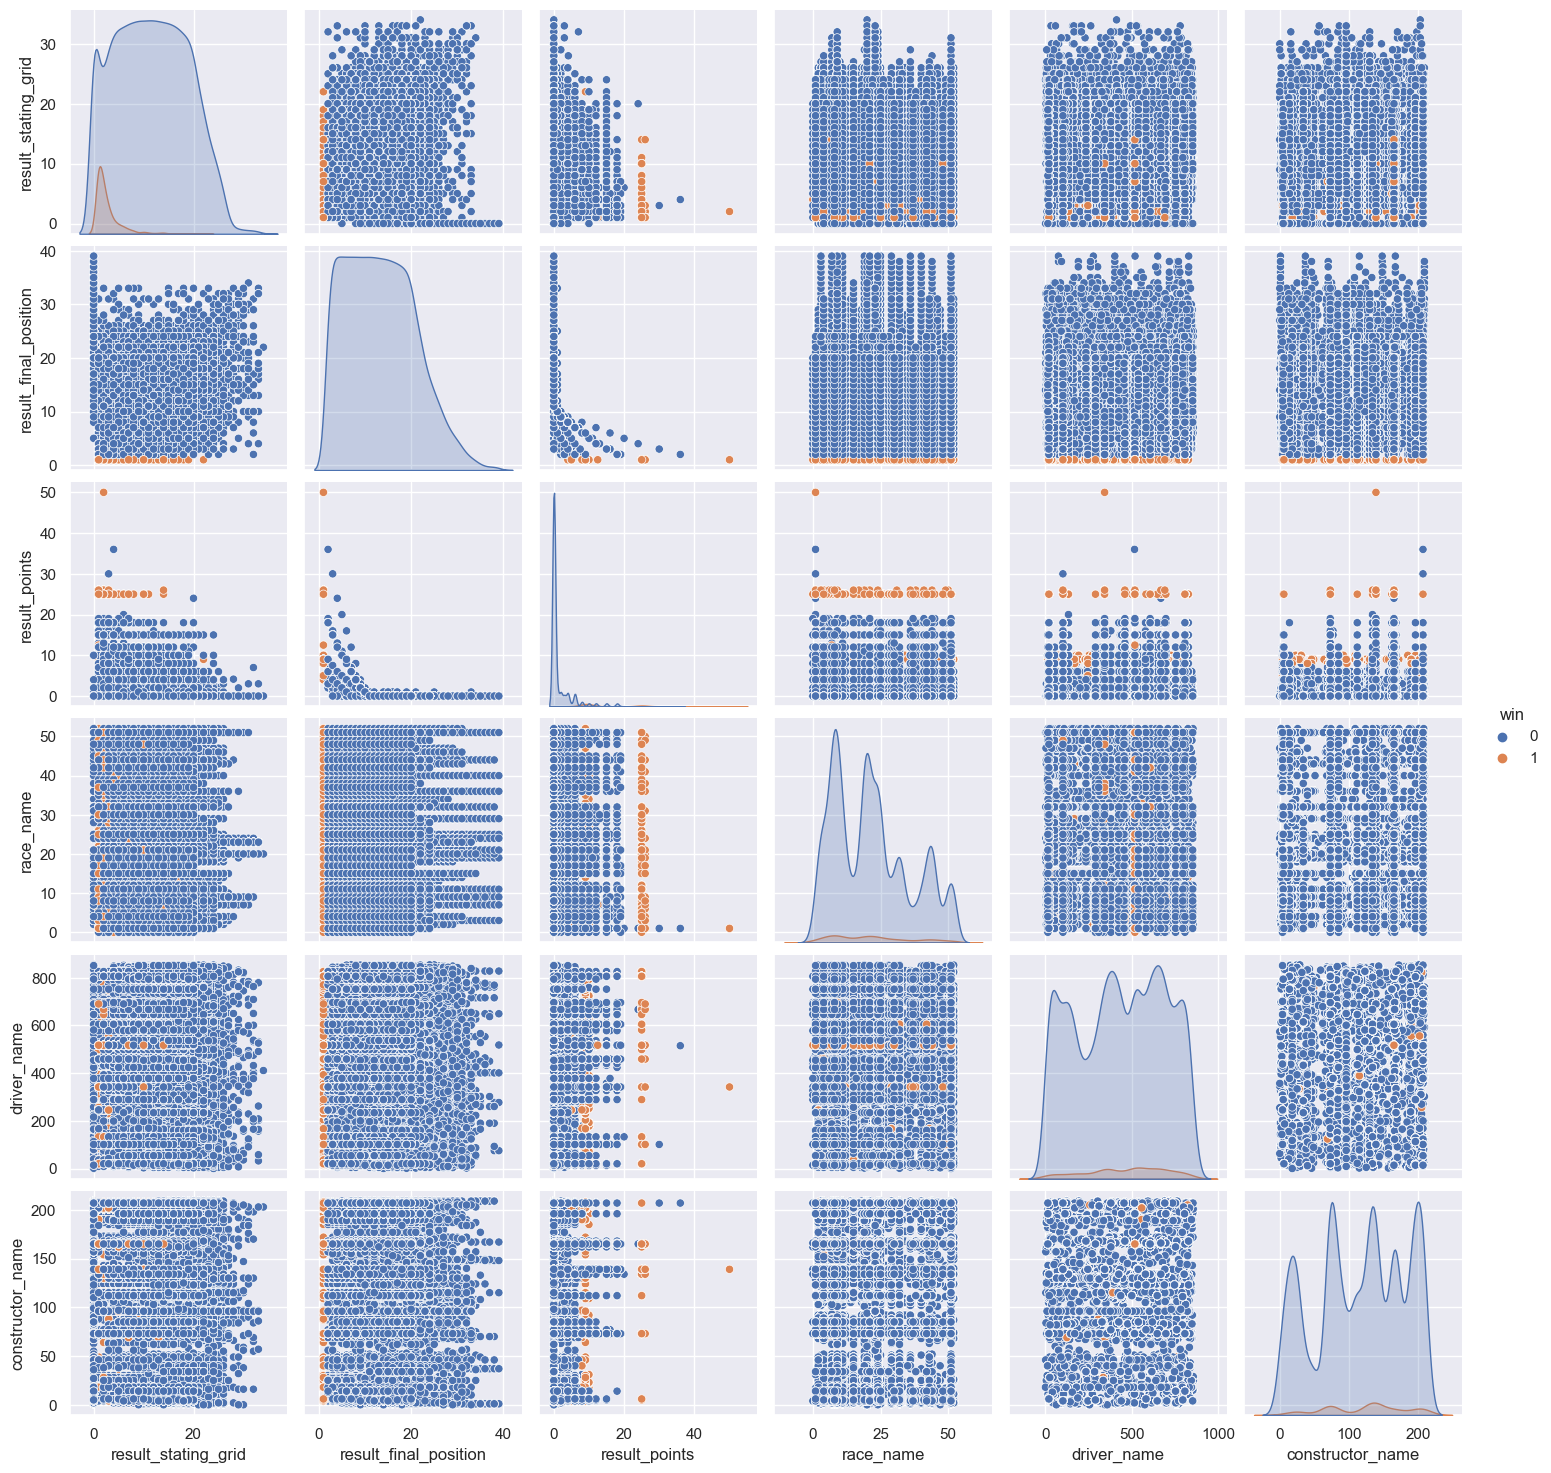

In [75]:
columns_to_plot1 = ['win', 'result_stating_grid', 'result_final_position', 'result_points', 'race_name', 'driver_name', 'constructor_name']
sns.pairplot(merged_df_encoded[columns_to_plot1],hue='win')

### Distribuição Considerando "podium_finish"

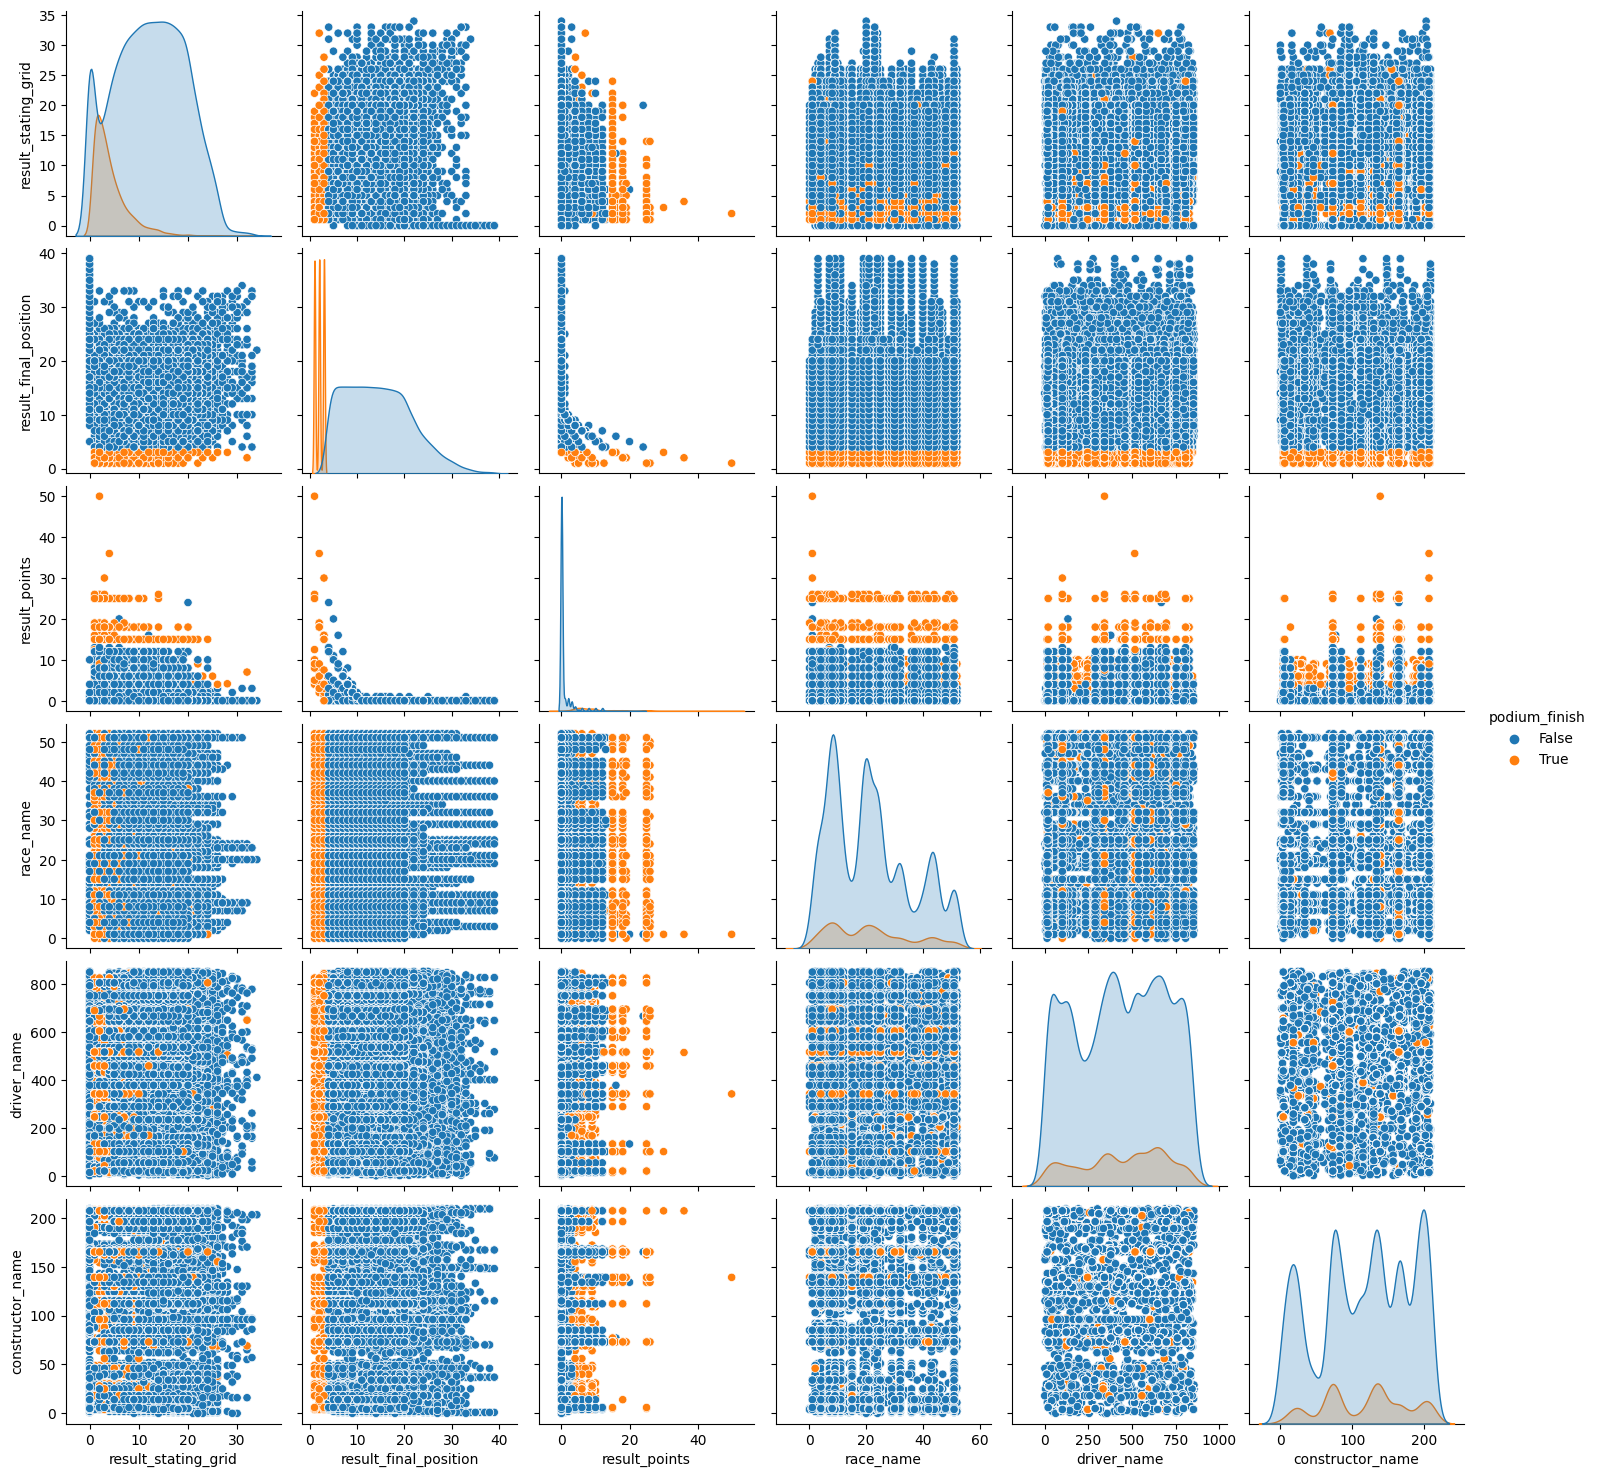

In [16]:
columns_to_plot1 = ['podium_finish', 'result_stating_grid', 'result_final_position', 'result_points', 'race_name', 'driver_name', 'constructor_name']
sns.pairplot(merged_df_encoded[columns_to_plot1],hue='podium_finish')

### Testando Modelos de Aprendizado

Verificando balanceamento da classe "podium_finish":

In [78]:
# Check the balance of the 'podium_finish' column
counts = merged_df_encoded['podium_finish'].value_counts(normalize=True)
print(counts)

podium_finish
0    0.873878
1    0.126122
Name: proportion, dtype: float64


In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

Não utilizaremos os dados de resultado a seguir no treinamento:

In [117]:
merged_df_encoded.drop(['result_final_position', 'result_points', 'win'], axis=1, inplace=True)

In [118]:
X = merged_df_encoded.drop('podium_finish', axis=1)
y = merged_df_encoded['podium_finish']

In [119]:
clfs = [DecisionTreeClassifier(),
        RandomForestClassifier(),
        SVC(),
        KNeighborsClassifier()]

from sklearn.model_selection import cross_val_score

classifiers = []
scores = []

for clf in clfs:
    cv_scores = cross_val_score(clf,X,y, cv=10, scoring='f1', n_jobs=-1)
    for s in cv_scores:
        classifiers.append(str(clf))
        scores.append(float(s))

results = pd.DataFrame({'classifier':classifiers,'F-score':scores})
results

classifier   F-score
0   DecisionTreeClassifier()  0.389474
1   DecisionTreeClassifier()  0.325530
2   DecisionTreeClassifier()  0.358261
3   DecisionTreeClassifier()  0.378657
4   DecisionTreeClassifier()  0.196353
5   DecisionTreeClassifier()  0.141372
6   DecisionTreeClassifier()  0.142977
7   DecisionTreeClassifier()  0.181893
8   DecisionTreeClassifier()  0.415274
9   DecisionTreeClassifier()  0.243802
10  RandomForestClassifier()  0.529052
11  RandomForestClassifier()  0.415813
12  RandomForestClassifier()  0.212560
13  RandomForestClassifier()  0.167539
14  RandomForestClassifier()  0.216535
15  RandomForestClassifier()  0.150134
16  RandomForestClassifier()  0.151035
17  RandomForestClassifier()  0.170040
18  RandomForestClassifier()  0.531250
19  RandomForestClassifier()  0.239852
20                     SVC()  0.000000
21                     SVC()  0.000000
22                     SVC()  0.000000
23                     SVC()  0.000000
24                     SVC()  0.000000
25                     SVC()  0.000000
26                     SVC()  0.000000
27                     SVC()  0.000000
28                     SVC()  0.000000
29                     SVC()  0.000000
30    KNeighborsClassifier()  0.409639
31    KNeighborsClassifier()  0.418685
32    KNeighborsClassifier()  0.211009
33    KNeighborsClassifier()  0.206089
34    KNeighborsClassifier()  0.104121
35    KNeighborsClassifier()  0.193642
36    KNeighborsClassifier()  0.125170
37    KNeighborsClassifier()  0.262570
38    KNeighborsClassifier()  0.479675
39    KNeighborsClassifier()  0.560411

<Axes: xlabel='classifier', ylabel='F-score'>

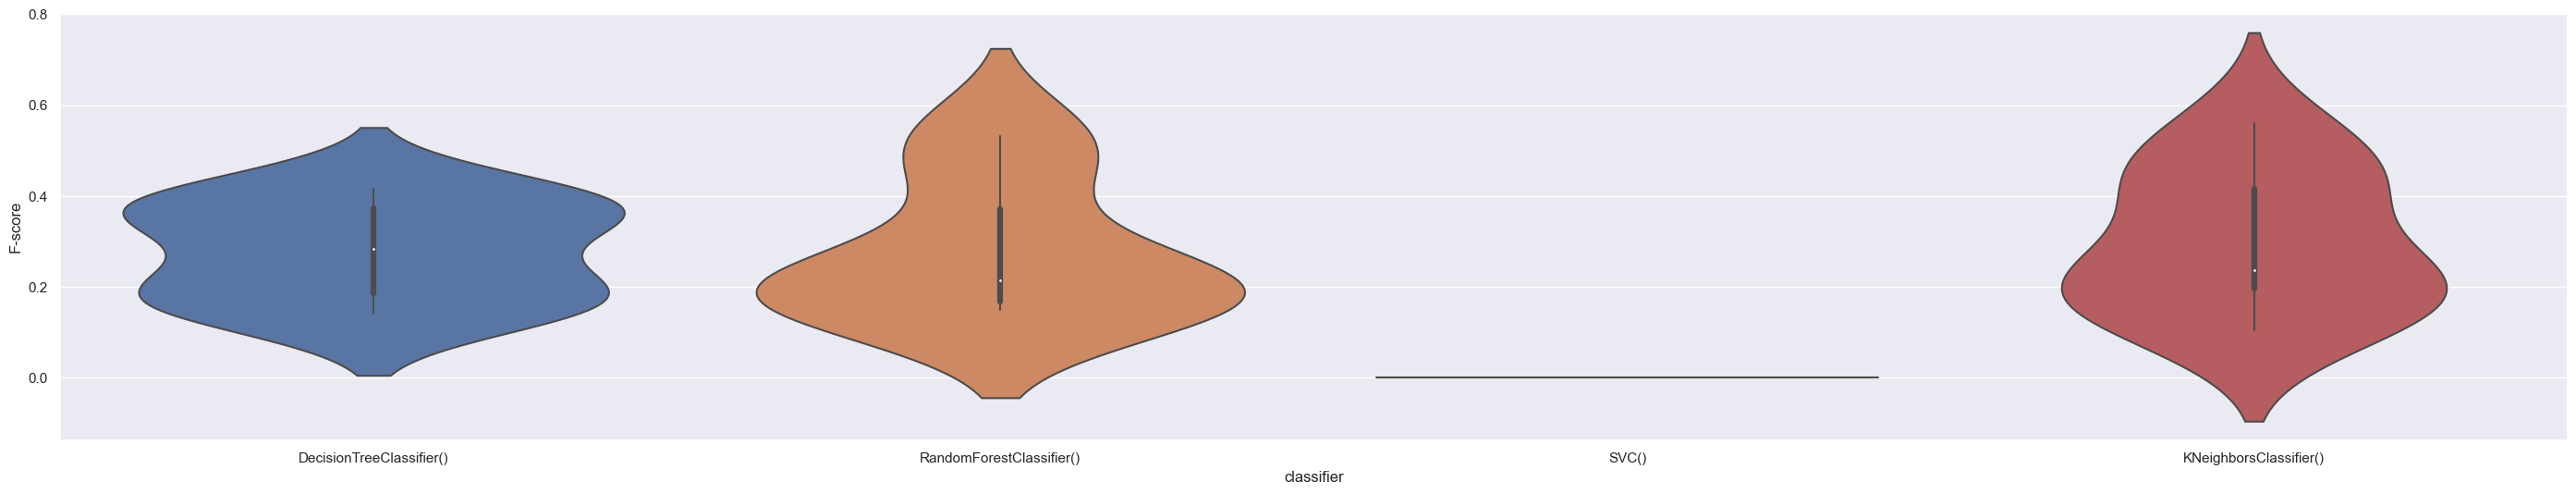

In [120]:
sns.set(rc={'figure.figsize':(35,6)})
sns.violinplot(data=results,x='classifier',y='F-score')

### Identificando melhores hyperparâmetros para DecisionTreeClassifier

In [125]:
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion':['gini','entropy','log_loss'],
              'max_depth':[2,3,4,5,6,7,8,9,10],
              }

grid = GridSearchCV(DecisionTreeClassifier(),param_grid,cv=10,scoring='f1_macro', n_jobs=-1)
grid.fit(X,y)
grid.best_params_

{'criterion': 'entropy', 'max_depth': 3}

### Identificando melhores hyperparâmetros para RandomForestClassifier

In [121]:
from sklearn.model_selection import GridSearchCV

param_grid = {'criterion':['gini','entropy','log_loss'],
              'max_depth':[2,3,4,5,6,7,8,9,10],
              }

grid = GridSearchCV(RandomForestClassifier(),param_grid,cv=10,scoring='f1', n_jobs=-1)
grid.fit(X,y)
grid.best_params_

{'criterion': 'log_loss', 'max_depth': 10}

### Identificando melhores hyperparâmetros para KNeighborsClassifier

Como as classes estão desequilibradas, decidi usar o scoring "f1_macro" pois calcula as métricas para cada classe individualmente e depois faz a média delas, tratando todas as classes de forma igual, independentemente de sua frequência. 

In [122]:
# "f1_macro"
param_grid = {'n_neighbors': [3, 5, 7, 9, 11],
              'weights': ['uniform', 'distance'],
              'p': [1, 2]}

grid = GridSearchCV(KNeighborsClassifier(),param_grid,cv=10,scoring='f1_macro', n_jobs=-1)
grid.fit(X,y)
grid.best_params_

{'n_neighbors': 11, 'p': 1, 'weights': 'distance'}

In [123]:
# "f1"
param_grid = {'n_neighbors': [3, 5, 7, 9, 11],
              'weights': ['uniform', 'distance'],
              'p': [1, 2]}

grid = GridSearchCV(KNeighborsClassifier(),param_grid,cv=10,scoring='f1_macro', n_jobs=-1)
grid.fit(X,y)
grid.best_params_

{'n_neighbors': 11, 'p': 1, 'weights': 'distance'}

### Retreinando o modelo com os hyperparâmetros

In [131]:
#comparando modelos
clfs = [DecisionTreeClassifier(criterion='entropy', max_depth=3),
        RandomForestClassifier(criterion='log_loss', max_depth=10),
        KNeighborsClassifier(n_neighbors=11, p=1, weights='distance')]
classifiers = []
scores = []
for clf in clfs:
    cv_scores = cross_val_score(clf,X,y, cv=10, scoring='f1_macro', n_jobs=-1)
    for s in cv_scores:
        classifiers.append(str(clf))
        scores.append(float(s))

results = pd.DataFrame({'classifier':classifiers,'F-score':scores})
results

classifier   F-score
0   DecisionTreeClassifier(criterion='entropy', ma...  0.769080
1   DecisionTreeClassifier(criterion='entropy', ma...  0.749533
2   DecisionTreeClassifier(criterion='entropy', ma...  0.784333
3   DecisionTreeClassifier(criterion='entropy', ma...  0.722477
4   DecisionTreeClassifier(criterion='entropy', ma...  0.682043
5   DecisionTreeClassifier(criterion='entropy', ma...  0.694505
6   DecisionTreeClassifier(criterion='entropy', ma...  0.668998
7   DecisionTreeClassifier(criterion='entropy', ma...  0.596809
8   DecisionTreeClassifier(criterion='entropy', ma...  0.787994
9   DecisionTreeClassifier(criterion='entropy', ma...  0.814947
10  RandomForestClassifier(criterion='log_loss', m...  0.740739
11  RandomForestClassifier(criterion='log_loss', m...  0.695759
12  RandomForestClassifier(criterion='log_loss', m...  0.562213
13  RandomForestClassifier(criterion='log_loss', m...  0.562573
14  RandomForestClassifier(criterion='log_loss', m...  0.526062
15  RandomForestClassifier(criterion='log_loss', m...  0.523518
16  RandomForestClassifier(criterion='log_loss', m...  0.532634
17  RandomForestClassifier(criterion='log_loss', m...  0.216821
18  RandomForestClassifier(criterion='log_loss', m...  0.771399
19  RandomForestClassifier(criterion='log_loss', m...  0.383620
20  KNeighborsClassifier(n_neighbors=11, p=1, weig...  0.656541
21  KNeighborsClassifier(n_neighbors=11, p=1, weig...  0.664171
22  KNeighborsClassifier(n_neighbors=11, p=1, weig...  0.574465
23  KNeighborsClassifier(n_neighbors=11, p=1, weig...  0.588915
24  KNeighborsClassifier(n_neighbors=11, p=1, weig...  0.523938
25  KNeighborsClassifier(n_neighbors=11, p=1, weig...  0.535914
26  KNeighborsClassifier(n_neighbors=11, p=1, weig...  0.498886
27  KNeighborsClassifier(n_neighbors=11, p=1, weig...  0.571288
28  KNeighborsClassifier(n_neighbors=11, p=1, weig...  0.710999
29  KNeighborsClassifier(n_neighbors=11, p=1, weig...  0.757398

<Axes: xlabel='classifier', ylabel='F-score'>

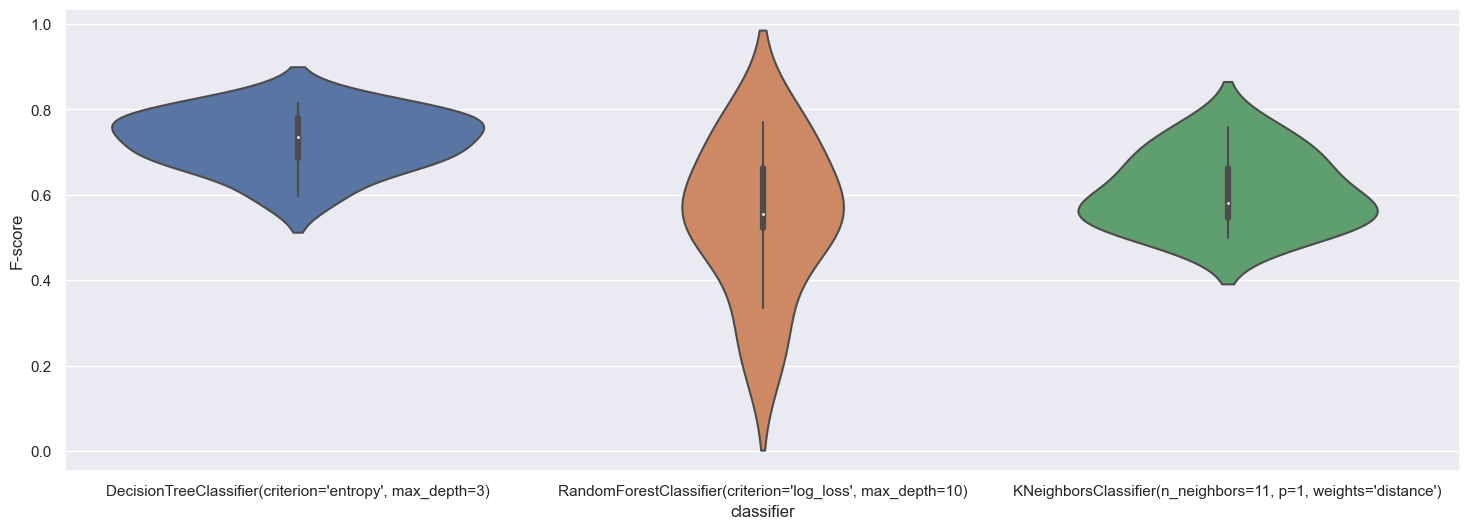

In [130]:
sns.set(rc={'figure.figsize':(18,6)})
sns.violinplot(data=results,x='classifier',y='F-score')

# Treinando modelo e fazendo previsões

## Usando o modelo DecisionTreeClassifier

In [133]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Separando o conjunto de dados em features (X) e target (y)
X = merged_df_encoded.drop('podium_finish', axis=1)
y = merged_df_encoded['podium_finish']

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criando a árvore de decisão
clf = DecisionTreeClassifier(random_state=42)

# Treinando o modelo
clf.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = clf.predict(X_test)

# Verificando a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))
#print(f"Acurácia do modelo: {accuracy}")

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      6776
           1       0.41      0.43      0.42       976

    accuracy                           0.85      7752
   macro avg       0.67      0.67      0.67      7752
weighted avg       0.85      0.85      0.85      7752



### Função de teste

In [141]:
import pandas as pd
def predict_finish_in_points(starting_grid, race_year, constructor_name, driver_name, race_name):
    # Create a DataFrame with the input data 
    constructor_name_predict = merged_df_base_train.query(f"constructor_name_str == '{constructor_name}'").iloc[0]['constructor_name']
    driver_name_predict = merged_df_base_train.query(f"driver_name_str == '{driver_name}'").iloc[0]['driver_name']
    race_name_predict = merged_df_base_train.query(f"race_name_str == '{race_name}'").iloc[0]['race_name']
    
    #starting_grid, race_year, race_name, driver_name, constructor_name
    data_to_predict = pd.DataFrame({
        'result_stating_grid': [starting_grid],
        'race_year': [race_year],
        'race_name': [race_name_predict],
        'driver_name': [driver_name_predict],
        'constructor_name': [constructor_name_predict]
    })

    # Predict if the driver will finish on the podium
    prediction = clf.predict(data_to_predict)
    
    #return prediction
    #print('Finish in podium' if prediction == 1 else 'Not finish in podium')    
    print(f'starting_grid: {starting_grid}\nrace_year: {race_year}\nconstructor_name: {constructor_name}\ndriver_name: {driver_name}\nrace_name: {race_name}\n{"Finish in podium" if prediction == 1 else "Not finish in podium"}\n-----')


### Gerar algumas strings de teste

In [ ]:
# Gerando strings de teste
import random

# From merged_df_base_train dataframe
for _ in range(10):
    # Generate random integers for grid position and year
    grid = random.randint(1, 24)
    year = random.randint(1984, 2022)

    # Randomly select a row from the DataFrame
    row = merged_df_base_train.sample(n=1)

    # Extract the values for race_name_str, constructor_name_str, race_year and driver_name_str
    constructor_name_str = row['constructor_name_str'].values[0]
    driver_name_str = row['driver_name_str'].values[0]
    race_name_str = row['race_name_str'].values[0]
    race_year = row['race_year'].values[0]

    # Generate the code string
    code_string = f'predict_finish_in_points({grid}, "{race_year}", "{constructor_name_str}", "{driver_name_str}", "{race_name_str}")'
    print(code_string)

In [163]:
# def predict_finish_in_points(starting_grid, race_year, constructor_name, driver_name, race_name):
predict_finish_in_points(4, "2023", "Red Bull", "hamilton", "Belgian Grand Prix")

starting_grid: 4
race_year: 2023
constructor_name: Red Bull
driver_name: hamilton
race_name: Belgian Grand Prix
Not finish in podium
-----


In [42]:
# Ponto de parada
# Daqui pra baixo é rascunho
raise KeyboardInterrupt

KeyboardInterrupt: 

# Testes antigos/Rascunhos

Decidi deixar essa parte no arquivo pois ainda vou estudar mais usando estes dados.

## Testando com One Hot Encoder

In [ ]:
merged_df_ohe=merged_df.copy()
merged_df_ohe.drop(['result_resultId', 'race_year', 'race_url', 'driver_nationality', 'driver_url', 'constructor_nationality'], axis=1, inplace=True)

# Convert the boolean columns to int
merged_df_ohe['win'] = merged_df_ohe['win'].astype(int)
merged_df_ohe['podium_finish'] = merged_df_ohe['podium_finish'].astype(int)

# Apply the One-Hot Encoding
merged_df_ohe = pd.get_dummies(merged_df_ohe, columns=['race_name', 'driver_name', 'constructor_name'])
merged_df_encoded.columns

### Modelo com 6 variáveis
'result_stating_grid', 'race_year', 'race_name', 'constructor_name', 'driver_driverRef', 'podium'

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Clean and prepare the data
# Converting the field 'result_final_position' to numeric, replacing any problematic values with NaN
merged_df['result_final_position'] = pd.to_numeric(merged_df['result_final_position'], errors='coerce')

# Copying the original dataframe to use on training
merged_df_train = merged_df.copy()

# Remove reccords where the final position is unknown
merged_df_train = merged_df_train.dropna(subset=['result_final_position'])  

In [ ]:
# Convert final position to a binary var, 1 if the pilot finishes on podium (top 3), 0 otherwise
merged_df_train['podium'] = merged_df_train['result_final_position'].apply(lambda x: 1 if x <= 3 else 0)

# Select only the collumns that we want for the model
merged_df_train = merged_df_train[['result_stating_grid', 'race_year', 'race_name', 'constructor_name', 'driver_driverRef', 'podium']]

In [ ]:
# Convert categorical columns to numeric
race_name_le = LabelEncoder()
constructor_name_le = LabelEncoder()
driver_driverRef_le = LabelEncoder()

# Converter colunas categóricas para numéricas
merged_df_train['race_name_num'] = race_name_le.fit_transform(merged_df_train['race_name'])
merged_df_train['constructor_name_num'] = constructor_name_le.fit_transform(merged_df_train['constructor_name'])
merged_df_train['driver_driverRef_num'] = driver_driverRef_le.fit_transform(merged_df_train['driver_driverRef'])

In [ ]:
# Copying the dataframe for conversion reference. We're doing this because we need to use the same mapping to convert new data that the user will provide.
df_train = merged_df_train.copy()  
df_train.drop(['race_name', 'constructor_name', 'driver_driverRef'], axis=1, inplace=True)

In [ ]:
# Split the dataset into training and test sets
X = df_train.drop('podium', axis=1)
y = df_train['podium']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Trein the model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      2324
           1       0.55      0.55      0.55       674

    accuracy                           0.80      2998
   macro avg       0.71      0.71      0.71      2998
weighted avg       0.80      0.80      0.80      2998



In [ ]:
def predict_finish_in_points(starting_grid, race_year, race_name, constructor_name, driver_name):
    # Create a DataFrame with the input data
    race_name_num_predict = merged_df_train.query(f"race_name == '{race_name}'").iloc[0]['race_name_num']
    
    constructor_name_num_predict = merged_df_train.query(f"constructor_name == '{constructor_name}'").iloc[0]['constructor_name_num']
    
    driver_driverRef_num_predict = merged_df_train.query(f"driver_driverRef == '{driver_name}'").iloc[0]['driver_driverRef_num']

    data_to_predict = pd.DataFrame({
        'result_stating_grid': [starting_grid],
        'race_year': [race_year],
        'race_name_num': [race_name_num_predict],
        'constructor_name_num': [constructor_name_num_predict],
        'driver_driverRef_num': [driver_driverRef_num_predict]
    })

    data_to_predict
    
    # Predict if the driver will finish on the podium
    prediction = clf.predict(data_to_predict)
    
    #return prediction
    #print('Finish in podium' if prediction == 1 else 'Not finish in podium')    
    print(f'driver_name: {driver_name}, starting grid: {starting_grid}, race_year: {race_year}, Circuito: {race_name}, constructor_name: {constructor_name} ==> {"Finish in podium" if prediction == 1 else "Not finish in podium"}')


Gerando strings de teste

In [ ]:
import random
import pandas as pd

# From merged_df_train dataframe

for _ in range(50):
    # Generate random integers for grid position and year
    grid = random.randint(1, 24)
    year = random.randint(1975, 2022)

    # Randomly select a row from the DataFrame
    row = merged_df_train.sample(n=1)

    # Extract the values for race_name_num, constructor_name_num, and driver_driverRef_num
    race_name_num = row['race_name'].values[0]
    constructor_name_num = row['constructor_name'].values[0]
    driver_driverRef_num = row['driver_driverRef'].values[0]

    # Generate the code string
    code_string = f'predict_finish_in_points({grid}, {year}, "{race_name_num}", "{constructor_name_num}", "{driver_driverRef_num}")'
    print(code_string)


Fazendo previsões

In [ ]:
predict_finish_in_points(10, 2008, 'Australian Grand Prix', 'McLaren', 'hamilton')

### Modelo com 4 variáveis

Vamos reduzir o número de campos para treinamento para piloto, equipe, grid de largada e podium.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Clean and prepare the data
# Converting the field 'result_final_position' to numeric, replacing any problematic values with NaN
merged_df['result_final_position'] = pd.to_numeric(merged_df['result_final_position'], errors='coerce')

# Copying the original dataframe to use on training
merged_df_train = merged_df.copy()

# Remove reccords where the final position is unknown
merged_df_train = merged_df_train.dropna(subset=['result_final_position'])  

# Convert final position to a binary var, 1 if the pilot finishes on podium (top 3), 0 otherwise
merged_df_train['podium'] = merged_df_train['result_final_position'].apply(lambda x: 1 if x <= 3 else 0)

# Select only the collumns that we want for the model
merged_df_train = merged_df_train[['result_stating_grid', 'constructor_name', 'driver_driverRef', 'podium']]

# Convert categorical columns to numeric
constructor_name_le = LabelEncoder()
driver_driverRef_le = LabelEncoder()

# Converter colunas categóricas para numéricas
merged_df_train['constructor_name_num'] = constructor_name_le.fit_transform(merged_df_train['constructor_name'])
merged_df_train['driver_driverRef_num'] = driver_driverRef_le.fit_transform(merged_df_train['driver_driverRef'])

# Copying the dataframe for conversion reference. We're doing this because we need to use the same mapping to convert new data that the user will provide.
df_train = merged_df_train.copy()  
df_train.drop(['constructor_name', 'driver_driverRef'], axis=1, inplace=True)

# Split the dataset into training and test sets
X = df_train.drop('podium', axis=1)
y = df_train['podium']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Trein the model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89      2324
           1       0.61      0.55      0.58       674

    accuracy                           0.82      2998
   macro avg       0.74      0.73      0.73      2998
weighted avg       0.82      0.82      0.82      2998



### Função para testes

In [ ]:
def predict_finish_in_points(starting_grid, constructor_name, driver_name):
    # Create a DataFrame with the input data 
    constructor_name_num_predict = merged_df_train.query(f"constructor_name == '{constructor_name}'").iloc[0]['constructor_name_num']
    driver_driverRef_num_predict = merged_df_train.query(f"driver_driverRef == '{driver_name}'").iloc[0]['driver_driverRef_num']

    data_to_predict = pd.DataFrame({
        'result_stating_grid': [starting_grid],
        'constructor_name_num': [constructor_name_num_predict],
        'driver_driverRef_num': [driver_driverRef_num_predict]
    })
 
    # Predict if the driver will finish on the podium
    prediction = clf.predict(data_to_predict)
    
    #return prediction
    #print('Finish in podium' if prediction == 1 else 'Not finish in podium')    
    print(f'driver_name: {driver_name}, starting grid: {starting_grid}, constructor_name: {constructor_name} ==> {"Finish in podium" if prediction == 1 else "Not finish in podium"}')

In [ ]:
# Gerando strings de teste
import random
import pandas as pd

# From merged_df_train dataframe

for _ in range(1):
    # Generate random integers for grid position and year
    grid = random.randint(1, 24)
    year = random.randint(1975, 2022)

    # Randomly select a row from the DataFrame
    row = merged_df_train.sample(n=1)

    # Extract the values for race_name_num, constructor_name_num, and driver_driverRef_num
    constructor_name_num = row['constructor_name'].values[0]
    driver_driverRef_num = row['driver_driverRef'].values[0]

    # Generate the code string
    code_string = f'predict_finish_in_points({grid}, "{constructor_name_num}", "{driver_driverRef_num}")'
    print(code_string)

In [ ]:
# Fazendo previsões
predict_finish_in_points(12, "McLaren", "prost")

## Modelo com 4 variáveis e 3 classes

Podium (posição final entre 4 e 10), Terminou pontuando (posição final entre 4 e 10), Terminou sem pontos(posição final maior que 10).

### Verificar se a base está balanceada:

Preparar os dados para o treinamento.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Clean and prepare the data
# Converting the field 'result_final_position' to numeric, replacing any problematic values with NaN
merged_df['result_final_position'] = pd.to_numeric(merged_df['result_final_position'], errors='coerce')

# Copying the original dataframe to use on training
merged_df_train = merged_df.copy()

# Remove reccords where the final position is unknown
merged_df_train = merged_df_train.dropna(subset=['result_final_position'])  

# Convert final position to a binary var, -1 if the pilot finishes on podium (top 3), 0 is not podium but in points and 1 if position greather than 10
merged_df_train['podium'] = merged_df_train['result_final_position'].apply(lambda x: -1 if x <= 3 else (0 if 4 <= x <= 10 else 1))

Vamos avançar um pouco mais e entender se a base está equilibrada para o número de classes.

In [ ]:
# Check the balance of the 'podium' column
counts = merged_df_train['podium'].value_counts(normalize=True)
print(counts)

podium
 0    0.423957
 1    0.393624
-1    0.182418
Name: proportion, dtype: float64


Realizando o balanceamento

In [ ]:
# Make sure the 'race_year' column is numeric
merged_df_train['race_year'] = pd.to_numeric(merged_df_train['race_year'], errors='coerce')

# Remove races prior to the year 2000
merged_df_train = merged_df_train[merged_df_train['race_year'] >= 2000]

# Prioritize most recent data
merged_df_train = merged_df_train.sort_values('race_year', ascending=False)

# Number of examples in the minority class
minority_class_count = merged_df_train['podium'].value_counts()[-1]

# Perform undersampling for classes 0 and 1
df_class_0 = merged_df_train[merged_df_train['podium'] == 0].iloc[:minority_class_count]
df_class_1 = merged_df_train[merged_df_train['podium'] == 1].iloc[:minority_class_count]

# Merge the undersampled classes with the minority class
merged_df_train = pd.concat([df_class_0, df_class_1, merged_df_train[merged_df_train['podium'] == -1]], axis=0)

# Check the balance of the 'podium' column
counts = merged_df_train['podium'].value_counts(normalize=True)
print(counts)

podium
 0    0.333333
 1    0.333333
-1    0.333333
Name: proportion, dtype: float64


In [ ]:
# Select only the collumns that we want for the model
merged_df_train = merged_df_train[['result_stating_grid', 'constructor_name', 'driver_driverRef', 'podium']]

# Convert categorical columns to numeric
constructor_name_le = LabelEncoder()
driver_driverRef_le = LabelEncoder()

# Converter colunas categóricas para numéricas
merged_df_train['constructor_name_num'] = constructor_name_le.fit_transform(merged_df_train['constructor_name'])
merged_df_train['driver_driverRef_num'] = driver_driverRef_le.fit_transform(merged_df_train['driver_driverRef'])

# Copying the dataframe for conversion reference. We're doing this because we need to use the same mapping to convert new data that the user will provide.
df_train = merged_df_train.copy()  
df_train.drop(['constructor_name', 'driver_driverRef'], axis=1, inplace=True)

# Split the dataset into training and test sets
X = df_train.drop('podium', axis=1)
y = df_train['podium']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Trein the model
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Evaluate the model
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.77      0.86      0.81       259
           0       0.58      0.55      0.56       282
           1       0.69      0.65      0.67       239

    accuracy                           0.68       780
   macro avg       0.68      0.69      0.68       780
weighted avg       0.68      0.68      0.68       780



Fazendo a limitação dos dados a partir do ano 2000 e o undersampling das classes menos representativas, conseguimos aumentar um pouco a precisão.

### Função para testes

In [ ]:
# Gerando strings de teste
import random
import pandas as pd

# From merged_df_train dataframe
for _ in range(50):
    # Generate random integers for grid position and year
    grid = random.randint(1, 24)
    year = random.randint(1975, 2022)

    # Randomly select a row from the DataFrame
    row = merged_df_train.sample(n=1)

    # Extract the values for race_name_num, constructor_name_num, and driver_driverRef_num
    constructor_name_num = row['constructor_name'].values[0]
    driver_driverRef_num = row['driver_driverRef'].values[0]

    # Generate the code string
    code_string = f'predict_finish_in_points({grid}, "{constructor_name_num}", "{driver_driverRef_num}")'
    print(code_string)

In [ ]:
def predict_finish_in_points(starting_grid, constructor_name, driver_name):
    # Create a DataFrame with the input data 
    constructor_name_num_predict = merged_df_train.query(f"constructor_name == '{constructor_name}'").iloc[0]['constructor_name_num']
    driver_driverRef_num_predict = merged_df_train.query(f"driver_driverRef == '{driver_name}'").iloc[0]['driver_driverRef_num']

    data_to_predict = pd.DataFrame({
        'result_stating_grid': [starting_grid],
        'constructor_name_num': [constructor_name_num_predict],
        'driver_driverRef_num': [driver_driverRef_num_predict]
    })
 
    # Predict if the driver will finish on the podium
    prediction = clf.predict(data_to_predict)
    
    #return prediction
    #print('Finish in podium' if prediction == 1 else 'Not finish in podium')    
    print(f'driver_name: {driver_name}, starting grid: {starting_grid}, constructor_name: {constructor_name} ==> {"Result: Finish in podium" if prediction == -1 else ("Result: Finish in points" if prediction == 0 else "Result: Not finish in points")}')


In [ ]:
# Fazendo previsões
predict_finish_in_points(12, "McLaren", "prost")
predict_finish_in_points(19, "Brabham", "piquet")
predict_finish_in_points(8, "Renault", "alonso")
predict_finish_in_points(18, "Lotus-Climax", "trevor_taylor")
predict_finish_in_points(14, "Lotus-Climax", "jack_brabham")
predict_finish_in_points(8, "Jordan", "karthikeyan")
predict_finish_in_points(1, "Ferrari", "gonzalez")
predict_finish_in_points(11, "Ferrari", "ascari")
predict_finish_in_points(8, "Toro Rosso", "sainz")
predict_finish_in_points(21, "Super Aguri", "davidson")
predict_finish_in_points(24, "Ferrari", "vettel")
predict_finish_in_points(3, "Shadow-Ford", "pryce")
predict_finish_in_points(21, "Sauber", "heidfeld")
predict_finish_in_points(10, "Red Bull", "perez")
predict_finish_in_points(11, "Williams", "keke_rosberg")
predict_finish_in_points(5, "Marussia", "glock")
predict_finish_in_points(24, "Red Bull", "vettel")
predict_finish_in_points(22, "Ferrari", "ickx")
predict_finish_in_points(11, "Theodore", "cecotto")
predict_finish_in_points(3, "Williams", "bottas")
predict_finish_in_points(15, "McLaren", "kovalainen")
predict_finish_in_points(10, "Ferrari", "michael_schumacher")
predict_finish_in_points(14, "BRM", "hill")
predict_finish_in_points(16, "Mercedes", "hamilton")
predict_finish_in_points(4, "Brawn", "barrichello")
predict_finish_in_points(13, "March", "amon")
predict_finish_in_points(16, "Brabham-BRM", "taylor")
predict_finish_in_points(16, "Aston Martin", "stroll")
predict_finish_in_points(15, "Mercedes", "michael_schumacher")
predict_finish_in_points(1, "McLaren", "hakkinen")
predict_finish_in_points(15, "AlphaTauri", "kvyat")
predict_finish_in_points(7, "Sauber", "ericsson")
predict_finish_in_points(13, "Ferrari", "raikkonen")
predict_finish_in_points(13, "McLaren", "norris")
predict_finish_in_points(24, "Renault", "kubica")
predict_finish_in_points(24, "McLaren", "emerson_fittipaldi")
predict_finish_in_points(9, "Toro Rosso", "kvyat")
predict_finish_in_points(14, "Marussia", "glock")
predict_finish_in_points(18, "HRT", "rosa")
predict_finish_in_points(11, "McLaren", "mass")
predict_finish_in_points(19, "Red Bull", "max_verstappen")
predict_finish_in_points(20, "McLaren-Ford", "hulme")
predict_finish_in_points(19, "Williams", "keke_rosberg")
predict_finish_in_points(9, "Surtees", "pace")
predict_finish_in_points(10, "Haas F1 Team", "kevin_magnussen")
predict_finish_in_points(21, "Williams", "frentzen")
predict_finish_in_points(24, "Jordan", "pantano")
predict_finish_in_points(5, "Renault", "hulkenberg")
predict_finish_in_points(19, "Red Bull", "max_verstappen")
predict_finish_in_points(3, "Renault", "hulkenberg")

## Aplicando método KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Split the dataset into training and test sets
X = df_train.drop('podium', axis=1)
y = df_train['podium']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model using KNN
knn = KNeighborsClassifier(n_neighbors=3)  # You can change the number of neighbors to any number that you think is appropriate for your data
knn.fit(X_train, y_train)

# Evaluate the model
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.80      0.83      0.82       259
           0       0.64      0.60      0.62       282
           1       0.70      0.74      0.72       239

    accuracy                           0.72       780
   macro avg       0.72      0.72      0.72       780
weighted avg       0.71      0.72      0.72       780

